<a href="https://colab.research.google.com/github/mrUnknown69Lkt/CG-MINIPROJ/blob/main/Iris_Recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports:

In [75]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Import Libraries

In [76]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [77]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Iris.csv")
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

To delete the colums 'Id'

In [78]:
df = df.drop(columns = ['Id'])
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

To display statistics about the data

In [79]:
df.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

To display basic info about the datatype

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


To display number of samples on each class

In [81]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing the dataset

Checking for NULL values

In [82]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#Exploratory data analysis

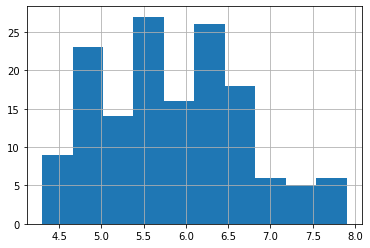

In [83]:
df['SepalLengthCm'].hist()

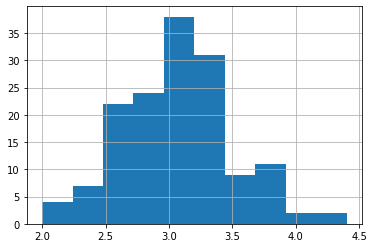

In [84]:
df['SepalWidthCm'].hist()

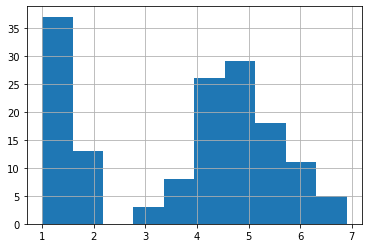

In [85]:
df['PetalLengthCm'].hist()

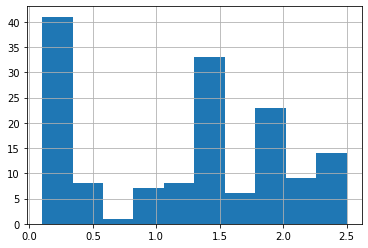

In [86]:
df['PetalWidthCm'].hist()

Scatterplot

In [87]:
colors = ['red' , 'orange' , 'blue']
species = ['Iris-virginica' , 'Iris-versicolor' , 'Iris-setosa']

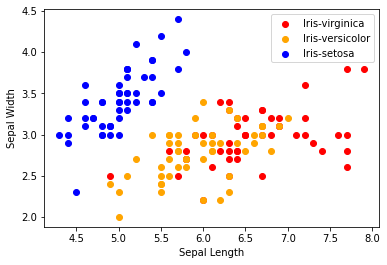

In [88]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'] , x['SepalWidthCm'] , c = colors[i] , label = species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Sepal Width")
  plt.legend()

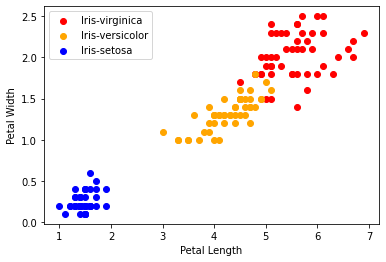

In [89]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'] , x['PetalWidthCm'] , c = colors[i] , label = species[i])
  plt.xlabel("Petal Length")
  plt.ylabel("Petal Width")
  plt.legend()

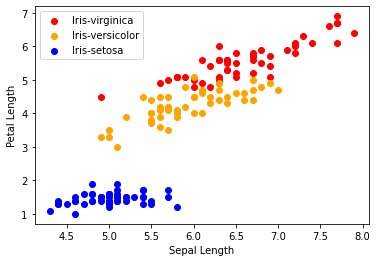

In [90]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'] , x['PetalLengthCm'] , c = colors[i] , label = species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Petal Length")
  plt.legend()

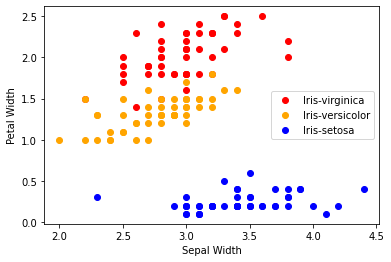

In [91]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalWidthCm'] , x['PetalWidthCm'] , c = colors[i] , label = species[i])
  plt.xlabel("Sepal Width")
  plt.ylabel("Petal Width")
  plt.legend()

Correlation Matrix

In [92]:
df.corr()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

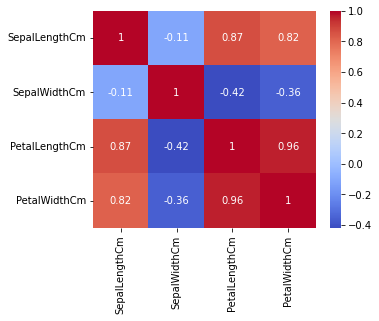

In [93]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr , annot = True , ax = ax , cmap = 'coolwarm')

#Label Encoder

In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [95]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0

#Model Training

In [96]:
from sklearn.model_selection import train_test_split
#train - 70
#test - 30
X = df.drop(columns = ['Species'])
Y = df['Species']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.30)

Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

Model Training

In [98]:
model.fit(x_train , y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Print Metric to get performance

In [99]:
print("Accuracy: ",model.score(x_test , y_test) * 100)

Accuracy:  100.0


KNN - K-nearest neighbors

In [100]:
#from sklearn.neighbors import KNeighborsClassifier
#model = KNeighborsClassifier()

In [101]:
#model.fit(x_train , y_train)

In [102]:
#print("Accuracy: ",model.score(x_test , y_test)*100)

Descision tree

In [103]:
#from sklearn.tree import DecisionTreeClassifier
#model = DecisionTreeClassifier()

In [104]:
#model.fit(x_train , y_train)

In [105]:
#print("Accuracy: ",model.score(x_test , y_test)*100)

#Predictions

In [106]:
expected = Y
predicted = model.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [107]:
from sklearn import metrics

Report for Predictions

In [108]:
print(metrics.classification_report(expected , predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [109]:
print(metrics.confusion_matrix(expected , predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
